In [35]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_Y), (test_x, test_Y) = fashion_mnist.load_data()

train_x = train_x/255.0
test_x = test_x/255.0

In [36]:
print(tf.__version__)

2.3.0


# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기

In [37]:
# reshape 이전
print("원본이미지 shape: ", train_x.shape, test_x.shape)

원본이미지 shape:  (60000, 28, 28) (10000, 28, 28)


In [38]:
train_X = train_x.reshape (-1, 28,28,1)
test_X = test_x.reshape (-1, 28,28,1)

#reshape 이후
print (" reshape이후: ", train_X.shape, test_X.shape )

 reshape이후:  (60000, 28, 28, 1) (10000, 28, 28, 1)



# 6.6 데이터 확인

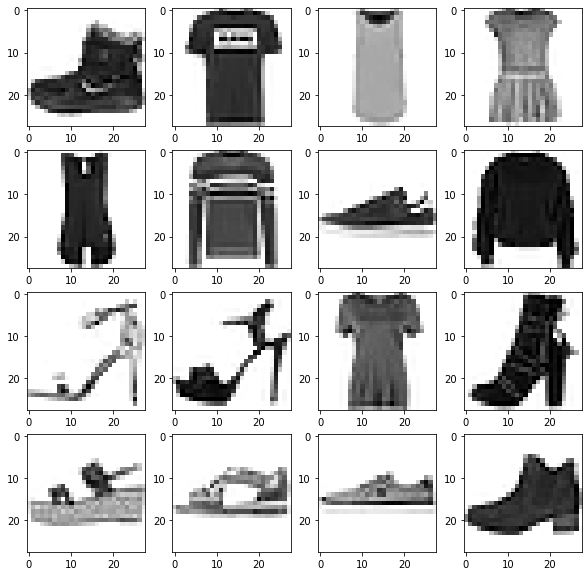

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
import matplotlib.pyplot as plt
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4,4, c+1)
    plt.imshow( train_X[c].reshape( 28,28), cmap=plt.cm.binary)

plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

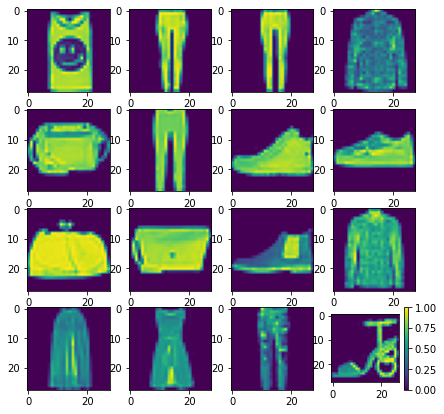

In [ ]:
plt.figure(figsize=(7, 7))
for c in range(101,117, 1):
    plt.subplot(4,4, c-100)
    plt.imshow( train_x[c])
    plt.grid(False)
plt.colorbar()
plt.show()

# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________


# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습

In [ ]:
history = model.fit ( train_X, train_Y, epochs=25, validation_split=0.25 )

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4667 - accuracy: 0.8326 - val_loss: 0.3770 - val_accuracy: 0.8630
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3423 - accuracy: 0.8744 - val_loss: 0.3750 - val_accuracy: 0.8676
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2898 - accuracy: 0.8929 - val_loss: 0.3675 - val_accuracy: 0.8677
Epoch 4/25
 901/1407 [==================>...........] - ETA: 1s - loss: 0.2371 - accuracy: 0.9112

KeyboardInterrupt: ignored

In [ ]:
model.save('my_fashionCNN.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
 
%cd /content/drive/My Drive/Colab Notebooks/data/model
 
import os
os.environ['MODEL_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/data/model/"


In [ ]:
!gsutil cp -r /content/my_fashionCNN.h5 my_fashionCNN.h5

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X, test_Y, verbose=0)


# 6.10 Fashion MNIST 분류 CNN 모델 정의 - Pooling, DropOut layer 추가

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)


# 6.12 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
model.save ('my_fashionDeep.h5')
!pwd

In [ ]:
import keras
Deep_model = keras.models.load_model('my_fashionDeep.h5')
Deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

# 6.14 Image Augmentation

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.

image_generator = ImageDataGenerator (
                rotation_range= 10,
                zoom_range = 0.10,
                shear_range = 0.5 ,
                width_shift_range = 0.10,
                height_shift_range= 0.10,
                horizontal_flip= True,
                vertical_flip= False )

augment_size=100

In [ ]:
x_augmented = image_generator.flow ( np.tile (train_X[0].reshape(28*28),100).reshape(-1, 28, 28, 1), np.zeros(augment_size),
                                    batch_size= augment_size, shuffle=False).next()[0]

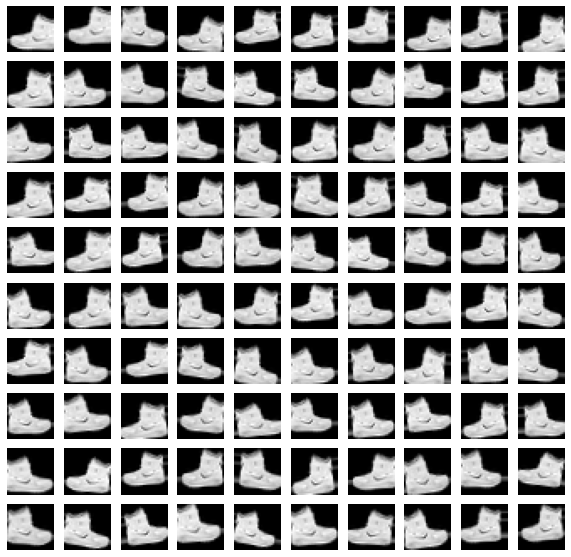

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(10,10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis("off")
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
train_X.shape[0]

60000


# 6.15 이미지 보강

In [41]:
image_generator = ImageDataGenerator (
                rotation_range= 10,
                zoom_range = 0.10,
                shear_range = 0.5 ,
                width_shift_range = 0.10,
                height_shift_range= 0.10,
                horizontal_flip= True,
                vertical_flip= False )

augment_size=30000

In [ ]:
randidx = np.random.randint (train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow( x_augmented, np.zeros(augment_size), 
                                   batch_size=augment_size, shuffle=False).next()[0]
#대체 왜??? 배치 사이즈를 증강사이즈로 잡는건가용??? 그러면 accuracy가 떨어질 것 같은데

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가
train_X = np.concatenate(( train_X, x_augmented ))
train_Y = np.concatenate(( train_Y, y_augmented ))

print(train_X.shape)

(90000, 28, 28, 1)


# 6.16 VGGNet style 네트워크 + Image Augmentation 학습

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
history = model.fit( train_X, train_Y, epochs=25, validation_split= 0.25)

Epoch 1/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.5866 - accuracy: 0.7859 - val_loss: 0.5790 - val_accuracy: 0.7813
Epoch 2/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3900 - accuracy: 0.8573 - val_loss: 0.5010 - val_accuracy: 0.8081
Epoch 3/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3503 - accuracy: 0.8744 - val_loss: 0.4583 - val_accuracy: 0.8298
Epoch 4/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3252 - accuracy: 0.8825 - val_loss: 0.4487 - val_accuracy: 0.8309
Epoch 5/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3131 - accuracy: 0.8860 - val_loss: 0.4364 - val_accuracy: 0.8385
Epoch 6/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3032 - accuracy: 0.8914 - val_loss: 0.4141 - val_accuracy: 0.8464
Epoch 7/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.2932 - accuracy: 0.8937 - val_loss: 0.4034 - val_ac

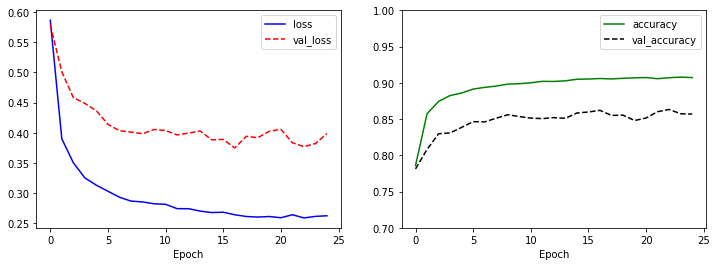

[0.22131772339344025, 0.9208999872207642]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
 
%cd /content/drive/My Drive/Colab Notebooks/data/model
 
model.save('my_fashionAugmentation.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/data/model


#6.17 배치 사이즈로 달리해서 다시 해 보기

In [42]:
randidx = np.random.randint (train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()

#배치 사이즈를 100개로 조정해서 accuracy, loss등 비교
x_augmented = image_generator.flow( x_augmented, np.zeros(augment_size), 
                                   batch_size=100, shuffle=False).next()[0]
# 아~~~ 배치 사이즈만큼 augment data가 나오는군요.

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가
train_X = np.concatenate(( train_X, x_augmented ))
train_Y = np.concatenate(( train_Y, y_augmented ))

print(train_X.shape)

(60100, 28, 28, 1)
